<a href="https://colab.research.google.com/github/longnguyen08/DA_Projects/blob/master/Stock_Price_Prediction/Stock_data_ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
link='https://drive.google.com/file/d/174U2_FGpEphjfOduVPtrPahs9UeAMGCD/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+link.split('/')[-2]
df = pd.read_csv(path)

In [ ]:
from datetime import datetime
df['date'] = df['date'].transform(lambda x: datetime.fromtimestamp(x))
df = df.iloc[::-1]
df.reset_index(drop=True, inplace=True)
df

,date,netChange,pctChange,priceClose,priceHigh,priceLow,priceOpen,volume
0,2013-07-15,-14.040879,-0.006711,2078.050093,2099.111412,2056.988775,2092.090972,768550.0
1,2013-07-16,-14.040879,-0.006757,2064.009214,2099.111412,2064.009214,2078.050093,502320.0
2,2013-07-17,0.000000,0.000000,2064.009214,2071.029654,2049.968335,2064.009214,280100.0
3,2013-07-18,56.163516,0.027211,2120.172731,2134.213610,2056.988775,2064.009214,871380.0
4,2013-07-19,28.081758,0.013245,2148.254489,2148.254489,2120.172731,2120.172731,596250.0
...,...,...,...,...,...,...,...,...
2545,2023-09-25,-1300.000000,-0.047619,26000.000000,27500.000000,25700.000000,27000.000000,36873300.0
2546,2023-09-26,200.000000,0.007692,26200.000000,26800.000000,25850.000000,25850.000000,30838600.0
2547,2023-09-27,300.000000,0.011450,26500.000000,26700.000000,26150.000000,26150.000000,20325300.0
2548,2023-09-28,100.000000,0.003774,26600.000000,26850.000000,26200.000000,26600.000000,16562600.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2550 entries, 0 to 2549
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        2550 non-null   datetime64[ns]
 1   netChange   2550 non-null   float64       
 2   pctChange   2550 non-null   float64       
 3   priceClose  2550 non-null   float64       
 4   priceHigh   2550 non-null   float64       
 5   priceLow    2550 non-null   float64       
 6   priceOpen   2550 non-null   float64       
 7   volume      2550 non-null   float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 159.5 KB


In [ ]:
df.sample(5)

,date,netChange,pctChange,priceClose,priceHigh,priceLow,priceOpen,volume
385,2022-03-17,-491.935484,-0.013948,34776.054591,35343.672457,34738.213400,35267.990075,15172700.0
1427,2018-01-09,775.369570,0.062249,13231.306537,13231.306537,12430.925045,12455.936967,5834620.0
1831,2016-06-06,-52.636937,-0.011173,4658.368911,4829.438955,4645.209676,4711.005847,15485513.0
115,2023-04-14,200.000000,0.009780,20650.000000,20850.000000,20500.000000,20550.000000,13807900.0
800,2020-07-20,-227.608487,-0.017544,12746.075258,13064.727139,12746.075258,12973.683745,12122590.0


In [ ]:
df[df['netChange'] == '0']

,date,netChange,pctChange,priceClose,priceHigh,priceLow,priceOpen,volume


In [ ]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA

from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import sqrt

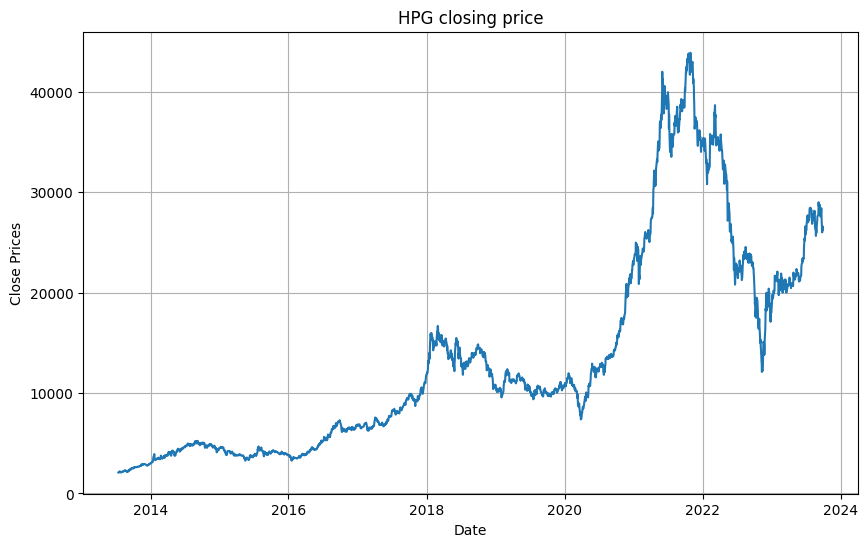

In [ ]:
#plot close price
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Close Prices')
plt.plot(df['date'],df['priceClose'])
plt.title('HPG closing price')
plt.show()


<Axes: ylabel='Density'>

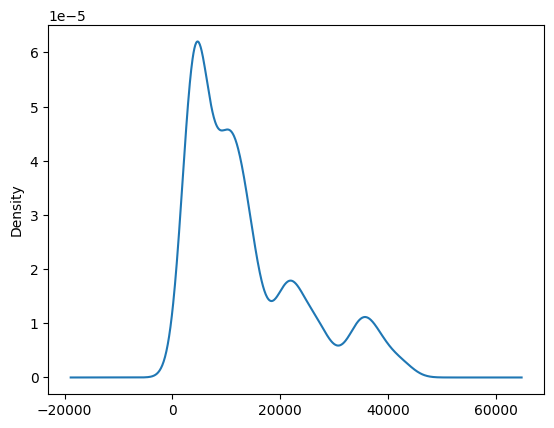

In [ ]:
#Distribution of the dataset
df['priceClose'].plot(kind='kde')

In [ ]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(df['priceClose'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
  print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.262362
p-value: 0.646211
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567


In [ ]:
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

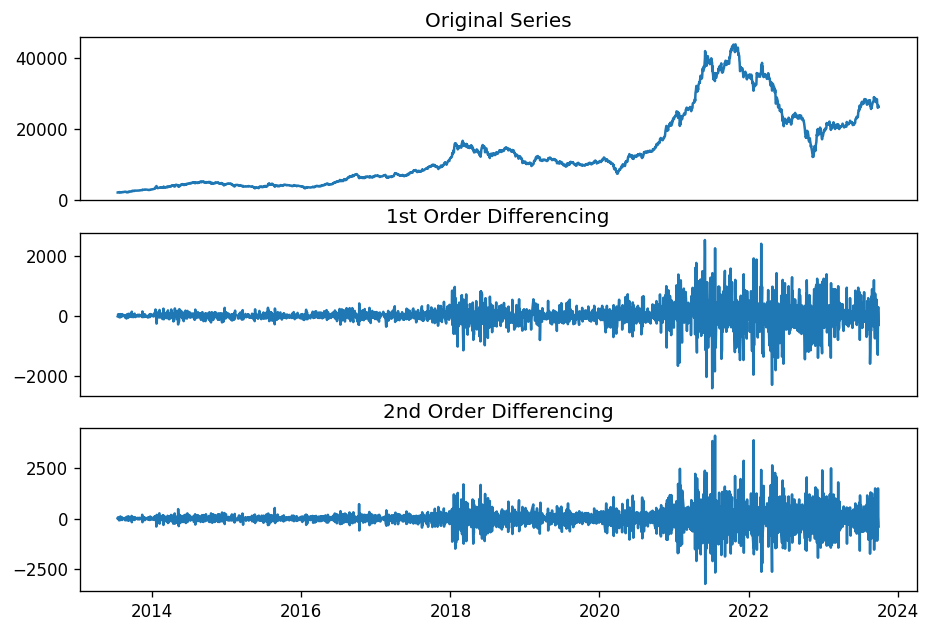

In [ ]:
# Original Series
fig, (ax1, ax2, ax3) = plt.subplots(3)
ax1.plot(df.date,df.priceClose); ax1.set_title('Original Series'); ax1.axes.xaxis.set_visible(False)
# 1st Differencing
ax2.plot(df.date,df.priceClose.diff()); ax2.set_title('1st Order Differencing'); ax2.axes.xaxis.set_visible(False)
# 2nd Differencing
ax3.plot(df.date,df.priceClose.diff().diff()); ax3.set_title('2nd Order Differencing')
plt.show()

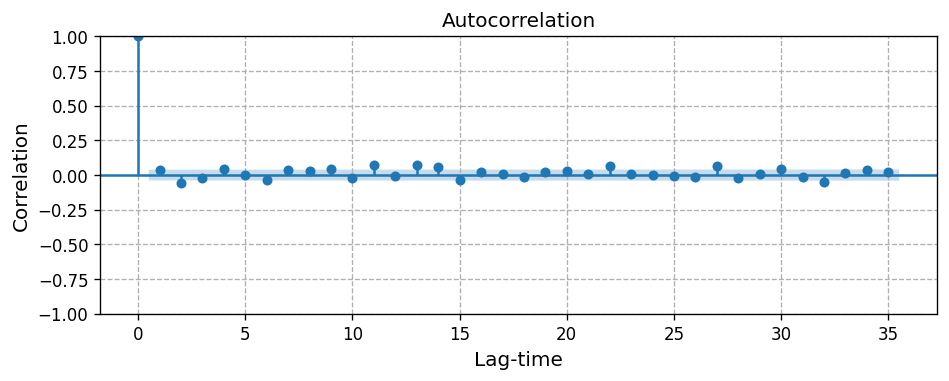

In [ ]:
# Vẽ tương quan giữa data gốc với các chuỗi MA (Tìm MA)
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(df.priceClose.diff().dropna()) #Hàm vẽ ACF
plt.grid(linestyle='--')
plt.ylabel('Correlation',fontsize=12)
plt.xlabel('Lag-time',fontsize=12)
plt.show()

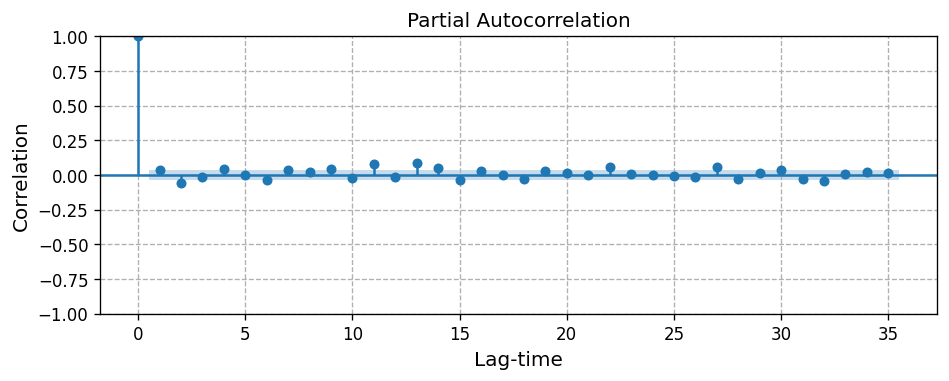

In [ ]:
# Vẽ tương quan giữa data gốc với các lag-time của nó- tự tương quan (AR) (Tìm AR)
plot_pacf(df.priceClose.diff().dropna()) #Hàm vẽ PACF
plt.grid(linestyle='--')
plt.ylabel('Correlation',fontsize=12)
plt.xlabel('Lag-time',fontsize=12)
plt.show()

In [ ]:
X=df.priceClose

In [ ]:
len(X)

2550

In [ ]:
size = int(len(X) * 0.9)
size

2295

In [ ]:
train, test = X[0:size], X[size:len(X)]

In [ ]:
test.reset_index(drop=True, inplace=True)

In [ ]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 17.2 MB/s eta 0:00:00


In [ ]:
import pmdarima as pm
model = pm.auto_arima(train, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=5, # maximum p and q
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0,
                      D=0,
                      information_criterion='oob',
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True,
                      stepwise=True)

print(model.summary())

/usr/local/lib/python3.10/dist-packages/pmdarima/arima/_validation.py:35: UserWarning: information_criterion cannot be 'oob' with out_of_sample_size = 0. Falling back to information criterion = aic.
  warnings.warn('information_criterion cannot be \'oob\' with '


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=33968.550, Time=2.50 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=33971.184, Time=0.13 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=33969.496, Time=0.24 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=33969.029, Time=0.39 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=33970.446, Time=0.10 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=33965.088, Time=1.53 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=33963.345, Time=0.76 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=33964.653, Time=1.18 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=33965.705, Time=2.27 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=33962.649, Time=0.13 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=33968.676, Time=0.11 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=33963.995, Time=0.17 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=33964.385, Time=0.84 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=33967.625, Time=0.37 sec
 ARIMA(3,1,1)(0,0,0

In [ ]:
#Dự báo với mô hình ARIMA
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import mean_absolute_percentage_error

In [ ]:
history = [i for i in train]
predictions = []
#Dự báo 1 bước thời gian
for t in range(len(test)):
  model = ARIMA(history,order=(2,1,0))
  model_fit = model.fit()
  output = model_fit.forecast()
  y_pred = output[0]
  predictions.append(y_pred)
  obs = test[t]
  history.append(obs)
  #print('Giá trị dự báo=%f, Giá trị thực tế=%f' % (y_pred, obs)) # Hiển thị giá trị dự báo của từng bước thời gian
# evaluate
mse=mean_squared_error(test, predictions)
rmse = sqrt(mse)
print('MSE: %.2f' % mse)
print('RMSE: %.2f' % rmse)

MSE: 291057.65
RMSE: 539.50


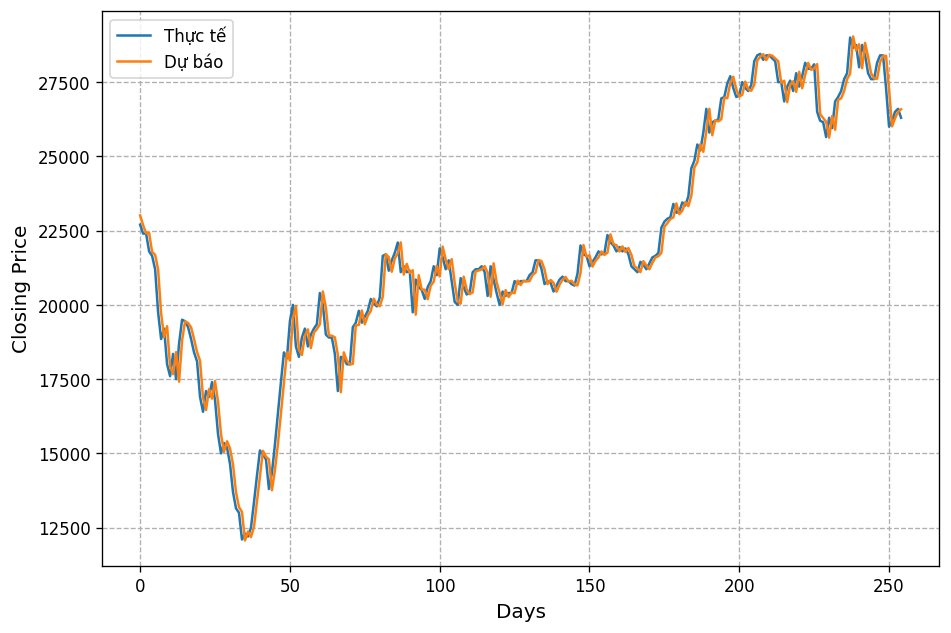

In [ ]:
#Hiển thị dữ liệu trong test set và dữ liệu dự báo
plt.figure(figsize=(9,6))
plt.plot(test,'-', markersize=8)
plt.plot(predictions,'-', markersize=8)
plt.grid(linestyle='--')
plt.ylabel('Closing Price',fontsize=12)
plt.xlabel('Days',fontsize=12)
plt.legend(['Thực tế','Dự báo'])

In [ ]:
pred=model_fit.forecast(15)
pred

array([26586.4231573 , 26579.99690719, 26580.53433562, 26580.93372733,
       26580.91832911, 26580.89423631, 26580.89416498, 26580.89557782,
       26580.89563926, 26580.89555873, 26580.89555186, 26580.89555631,
       26580.89555689, 26580.89555666, 26580.89555661])